<a href="https://colab.research.google.com/github/myusuf1982/Prediksi-Saham/blob/main/Stoc_prediction_OK%20-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [166]:
dataset_train = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")
#training_set = dataset_train.iloc[:, 1:2].values     # open saja, Default
training_set = dataset_train.iloc[0:20, 1:3].values   # Open dan high
#training_set = dataset_train.iloc[0:2, 1:4].values   # Open, high dan low
dataset_train.head(3)

,Tanggal,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800


In [165]:
print(training_set)

[[778.200012 781.650024]
 [767.25     769.950012]
 [750.659973 770.359985]
 [774.5      785.190002]
 [783.400024 795.632996]
 [779.940002 791.22699 ]
 [791.169983 791.169983]
 [756.539978 760.780029]
 [755.599976 757.849976]
 [746.969971 764.416016]
 [755.200012 766.359985]
 [766.919983 772.700012]
 [771.369995 775.      ]
 [762.609985 769.700012]
 [772.630005 776.960022]
 [767.72998  768.28302 ]
 [764.26001  765.      ]
 [760.       779.530029]
 [771.530029 778.5     ]
 [770.070007 772.98999 ]
 [757.440002 759.849976]
 [744.590027 754.      ]
 [757.710022 763.900024]
 [764.72998  768.830017]
 [761.       771.359985]
 [772.47998  778.179993]
 [780.       789.429993]
 [785.039978 791.25    ]
 [793.900024 804.380005]
 [797.400024 804.      ]
 [797.340027 803.      ]
 [800.400024 800.856018]
 [790.219971 797.659973]
 [796.76001  798.650024]
 [795.840027 796.676025]
 [792.359985 793.320007]
 [790.900024 792.73999 ]
 [790.679993 797.859985]
 [793.700012 794.22998 ]
 [783.330017 785.929993]


In [168]:
from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))    # (feature_range = (0, 1)) 0 = ?, 1 = maksimal di angka 0.1
sc = MinMaxScaler(feature_range = (0, 1))

#training_set_scaled = sc.fit_transform(training_set)   #training_set  = len = 252
training_set_scaled = training_set   #training_set  = len = 252
print(training_set_scaled)

[[778.200012 781.650024]
 [767.25     769.950012]
 [750.659973 770.359985]
 [774.5      785.190002]
 [783.400024 795.632996]
 [779.940002 791.22699 ]
 [791.169983 791.169983]
 [756.539978 760.780029]
 [755.599976 757.849976]
 [746.969971 764.416016]
 [755.200012 766.359985]
 [766.919983 772.700012]
 [771.369995 775.      ]
 [762.609985 769.700012]
 [772.630005 776.960022]
 [767.72998  768.28302 ]
 [764.26001  765.      ]
 [760.       779.530029]
 [771.530029 778.5     ]
 [770.070007 772.98999 ]]


In [ ]:
# Untuk latihan check Data
g=3
i=4
# print(training_set[g:i,0 ])    # [g:i,0 ] g = start row, i = jumlah row, 0 = dibuat dalam 1 array 
#print(training_set) # Hanya kolom Open
#print(len(training_set)) 
training_set = dataset_train.iloc[0:2, 1:3].values
print (training_set)


In [169]:
X_train = []
y_train = []
for i in range(6, 9): #iterasi mulai dari 6 ke 249    |  [0.12328511 0.08311926 0.02226523 0.10971306 0.14235932 0.12966758]
    #print(i) # i mulai 6 sampai dgn 249
    X_train.append(training_set_scaled[i-6:i, 0]) #i=6 =6-6=0=start index dari 0, tanda setelah koma 0= index coumn yg dipakai atau 0 = open 1= high
    y_train.append(training_set_scaled[i, 0])
    #print(training_set_scaled[i-6:i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)   # [[a b c d e f ] , 6 x abjad/angka 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)  # [[[a][b][c]][[d][e]]...dst], bentuknya


 

[[778.200012 767.25     750.659973 774.5      783.400024 779.940002]
 [767.25     750.659973 774.5      783.400024 779.940002 791.169983]
 [750.659973 774.5      783.400024 779.940002 791.169983 756.539978]]
[[[778.200012]
  [767.25    ]
  [750.659973]
  [774.5     ]
  [783.400024]
  [779.940002]]

 [[767.25    ]
  [750.659973]
  [774.5     ]
  [783.400024]
  [779.940002]
  [791.169983]]

 [[750.659973]
  [774.5     ]
  [783.400024]
  [779.940002]
  [791.169983]
  [756.539978]]]


In [170]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [172]:
regressor = Sequential()
#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #input_shape = (6,1))) (juml row hrus sma dgn di append=6, juml column=1)
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (6,1))) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compile
print(X_train)
regressor.fit(X_train, y_train, epochs = 2, batch_size = 32) # Fit


[[[778.200012]
  [767.25    ]
  [750.659973]
  [774.5     ]
  [783.400024]
  [779.940002]]

 [[767.25    ]
  [750.659973]
  [774.5     ]
  [783.400024]
  [779.940002]
  [791.169983]]

 [[750.659973]
  [774.5     ]
  [783.400024]
  [779.940002]
  [791.169983]
  [756.539978]]]
Epoch 1/2
1/1 [==============================] - 5s 5s/step - loss: 589691.0000
Epoch 2/2
1/1 [==============================] - 0s 17ms/step - loss: 589239.2500


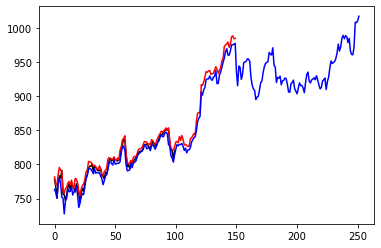

In [161]:
dataset_test = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")
end = len(dataset_test) # kalau tidak mau repot kasih tanda saja : [:, 3:4]

real_stock_price = dataset_test.iloc[0:100, 1:2].values   # 0 start index, end jumlh index
real_stock_price_open = dataset_test.iloc[0:150, 2:3].values   # 0 start index, end jumlh index
real_stock_price_volume = dataset_test.iloc[0:end, 3:4].values   # 0 start index, end jumlh index
plt.plot(real_stock_price, color = 'black')   # Hitam Open
plt.plot(real_stock_price_open, color = 'red')  # Merah High
plt.plot(real_stock_price_volume, color = 'blue')  # Biru Low

In [ ]:
# Predicting Future Stock using the Test Set 
# Set the time step as 60 (as seen previously)

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 6:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

  
for i in range(6, 100):
    X_test.append(inputs[i-6:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



3/3 [==============================] - 0s 6ms/step
[[895.9079 ]
 [897.6    ]
 [894.1812 ]
 [881.98834]
 [863.6471 ]
 [840.1158 ]
 [812.28033]
 [811.72156]
 [812.5029 ]
 [815.2828 ]
 [814.8854 ]
 [812.82324]
 [810.71796]
 [806.968  ]
 [807.2784 ]
 [808.0121 ]
 [810.1316 ]
 [811.5388 ]
 [811.54645]
 [810.97955]
 [811.49365]
 [810.7132 ]
 [810.17615]
 [809.80396]
 [809.85156]
 [808.4126 ]
 [807.14124]
 [807.67236]
 [810.3685 ]
 [812.26654]
 [814.02826]
 [816.94006]
 [819.119  ]
 [820.74677]
 [821.9992 ]
 [822.2746 ]
 [822.0763 ]
 [821.77313]
 [820.9508 ]
 [821.2984 ]
 [820.7181 ]
 [820.01184]
 [819.4542 ]
 [818.9174 ]
 [818.29535]
 [817.3153 ]
 [817.864  ]
 [818.97144]
 [821.08655]
 [822.52966]
 [824.647  ]
 [825.94934]
 [825.9922 ]
 [825.8296 ]
 [826.00903]
 [825.938  ]
 [826.0006 ]
 [826.4802 ]
 [827.6928 ]
 [829.63293]
 [831.74097]
 [833.7793 ]
 [833.6152 ]
 [831.8551 ]
 [828.3554 ]
 [824.5404 ]
 [822.7889 ]
 [823.2223 ]
 [823.5255 ]
 [824.82446]
 [825.3266 ]
 [826.56006]
 [827.6179 ]


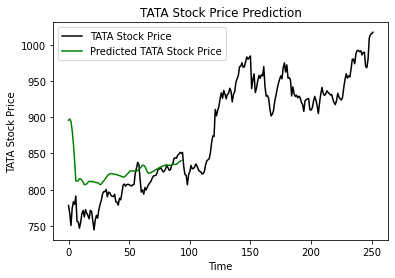

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')   # Hitam
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price') # Hijo
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

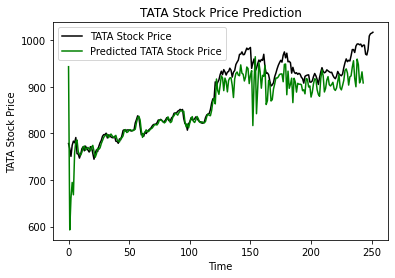

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

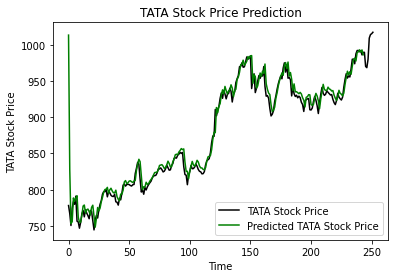

In [ ]:
#1000  epoch
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

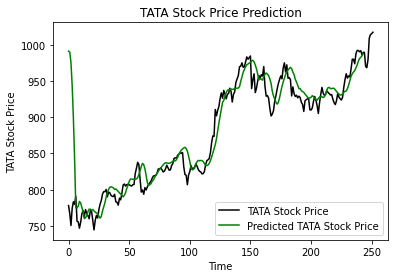

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()